In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df_prices = pd.read_excel('RC_F01_12_2018_T01_12_2023.xlsx')
df_ipc = pd.read_csv('russia.index.cpi (statbureau.org).csv')


C:\Users\Denis\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
# Удаляем строку с индексом 0, так как она имеет значение единственное в месяце

df_prices = df_prices.drop(index=0).reset_index()
df_prices.head(70)

,index,nominal,data,curs,cdx
0,1,1,2023-11-30,88.8841,Доллар США
1,2,1,2023-11-29,88.6102,Доллар США
2,3,1,2023-11-28,88.7045,Доллар США
3,4,1,2023-11-25,88.8133,Доллар США
4,5,1,2023-11-24,88.1206,Доллар США
...,...,...,...,...,...
65,66,1,2023-08-30,95.7070,Доллар США
66,67,1,2023-08-29,95.4717,Доллар США
67,68,1,2023-08-26,94.7117,Доллар США
68,69,1,2023-08-25,94.4007,Доллар США


In [3]:
df_ipc.head()

,Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
0,1991,106.20,104.80,106.30,163.50,103.00,101.20,100.60,100.50,101.10,103.50,108.90,112.10
1,1992,345.30,138.00,129.90,121.70,111.90,119.10,110.60,108.60,111.50,122.90,126.10,125.20
2,1993,125.80,124.70,120.10,118.70,118.10,119.90,122.39,126.00,123.00,119.50,116.39,112.50
3,1994,117.90,110.82,107.41,108.49,106.91,106.00,105.33,104.62,107.96,115.00,114.61,116.44
4,1995,117.77,111.02,108.94,108.47,107.93,106.66,105.38,104.56,104.46,104.72,104.56,103.20


In [4]:
df_prices['data'] = pd.to_datetime(df_prices['data'])
df_prices['year_month'] = df_prices['data'].dt.to_period('M')
df_prices = df_prices.groupby('year_month').agg({'curs': 'mean'}).reset_index()

In [5]:
df_prices.head()

,year_month,curs
0,2018-12,67.335314
1,2019-01,66.512544
2,2019-02,65.810525
3,2019-03,65.092257
4,2019-04,64.603105


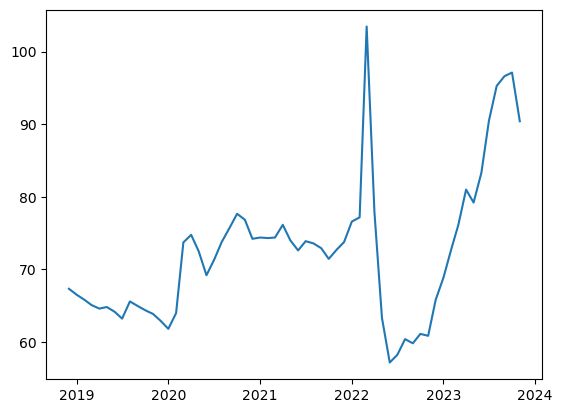

In [7]:
df_prices['year_month'] = df_prices['year_month'].dt.to_timestamp()

plt.plot(df_prices['year_month'], df_prices['curs'])

In [8]:
# Переводим год в тип numeric для дайльнейшей фильтрации
df_ipc['Год'] = pd.to_numeric(df_ipc['Год'], errors='coerce')
# Выводим только значения годо больше или равные 2018
df_ipc = df_ipc[df_ipc['Год'] >= 2018].reset_index()

df_ipc['inflation'] = (df_ipc.iloc[:, 2:].mean(axis=1).round(2)) - 100

df_ipc.head()

,index,Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,inflation
0,27,2018,100.31,100.21,100.29,100.38,100.38,100.49,100.27,100.01,100.16,100.35,100.50,100.84,0.35
1,28,2019,101.01,100.44,100.32,100.29,100.34,100.04,100.20,99.76,99.84,100.13,100.28,100.36,0.25
2,29,2020,100.40,100.33,100.55,100.83,100.27,100.22,100.35,99.96,99.93,100.43,100.71,100.83,0.40
3,30,2021,100.67,100.78,100.66,100.58,100.74,100.69,100.31,100.17,100.60,101.11,100.96,100.82,0.67
4,31,2022,100.99,101.17,107.61,101.56,100.12,99.65,99.61,99.48,100.05,100.18,100.37,100.78,0.96


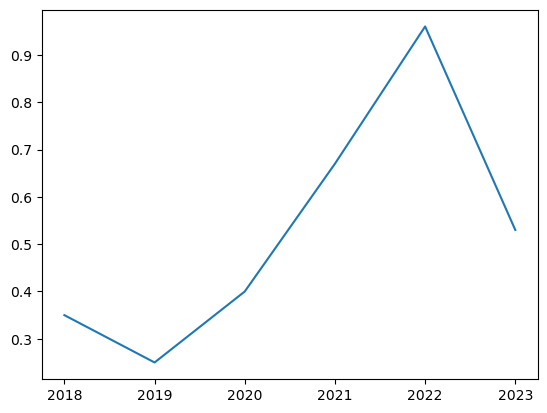

In [15]:
plt.plot(df_ipc['Год'], df_ipc['inflation'])